In [1]:
__author__ = "Philipp Kats"
__date__ = "2016_02_04"

%pylab inline
import pylab as plt
import pandas as pd
import sqlite3
import os

Populating the interactive namespace from numpy and matplotlib


In [46]:
PWD = os.getenv('PWD')
path = '/'.join(PWD.split('/')[:-1]) + '/CUSP_QC_twitter_scripts/data/aggregated/gnip_twitter.db'
# path

In [19]:
conn = sqlite3.connect(path)
all = conn.cursor().execute('SELECT * FROM tweets').fetchall()
conn.close()

In [20]:
df = pd.DataFrame(all)

In [21]:
df.columns = ('id', 'utimestamp','lon','lat','text','uid','rtwtCount','fwrtCount','source')
df['ts'] = pd.to_datetime(df.utimestamp, unit='s')
df.set_index('id', inplace=1)

In [23]:
df.head(3)

,utimestamp,lon,lat,text,uid,rtwtCount,fwrtCount,source,ts
id,,,,,,,,,
666043003149164545,1447650001,40.859396,-73.930999,Bae &amp; I 💜 @ Maranello Restaurant &amp; Lo...,239989824,0,0,Instagram,2015-11-16 05:00:01
666043003874643969,1447650001,40.726446,-74.001801,ニューヨーク/New York\nNew York/United States at 7 e...,934798284,0,0,world7evening,2015-11-16 05:00:01
666043022170267648,1447650005,40.690147,-73.996359,"I'm at @Hibino_brooklyn in Brooklyn, NY https:...",57466101,0,0,Foursquare,2015-11-16 05:00:05


In [25]:
len(df)

13029

In [27]:
df.source.value_counts().head(10)

Instagram              9164
Foursquare             1313
511NY-Tweets            448
Twitter for Android     341
Twitter for iPhone      267
Squarespace             252
dlvr.it                 250
Tweetbot for iΟS        145
TTN NYC traffic         111
COS App                  93
Name: source, dtype: int64

## REsample and get timeline

In [38]:
dft = df[['ts','uid']].set_index('ts').resample('D', how='count')

In [39]:
dft

,uid
ts,
2015-11-16,9126
2015-11-17,3903


In [43]:
dft15 = df[['ts','uid']].set_index('ts').resample('15Min', how='count')

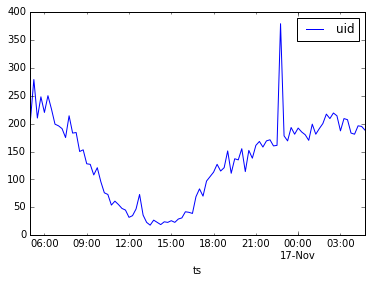

In [45]:
dft15.plot()